##  T2 - PRINCIPAL COMPONENT ANALYSIS (PCA): Eigenfaces

In [1]:
from numpy.linalg import matrix_rank
from matplotlib import pyplot as plt

In [2]:
try:
    from sklearn.datasets import fetch_olivetti_faces
except ModuleNotFoundError:
    %pip install -qq scikit-learn
    from sklearn.datasets import fetch_olivetti_faces
import numpy as np
from sklearn.decomposition import PCA

In [3]:
np.random.seed(0)
# load the faces (value from 0 to 1)
faces = fetch_olivetti_faces()
img = faces['images']
X = faces['data']
target = faces['target']
y = np.ravel(np.repeat(np.arange(1, 41), 10))

In [5]:
h, w, n = 64, 64, len(img)

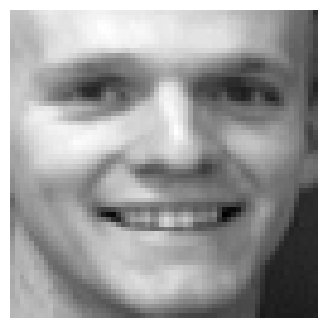

In [6]:
# Plot the first face (X[0]) as a square figure
plt.figure(figsize=(4, 4))  # Adjust the size as needed
plt.imshow(X[42].reshape(h, w), cmap='gray')
plt.axis('off')  # Turn off the axis labels
plt.show()

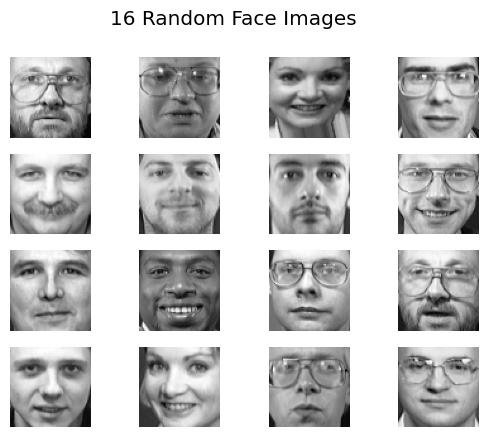

In [7]:
# Select 16 random faces
val = np.random.choice(n, 16, replace=False)
fig, axs = plt.subplots(4, 4)
fig.suptitle("16 Random Face Images ", fontsize="x-large")
for i in range(16):
    r, c = int(i / 4), i % 4
    axs[r, c].imshow(X[val[i]].reshape(h, w), cmap='gray')
    axs[r, c].axis('off')

In [8]:
print('Performing PCA')
mu = np.mean(X, axis=0)
XC = X - mu

pca = PCA()
pca.fit(XC)
V = pca.components_
Z = np.dot(XC, V.T)

Performing PCA


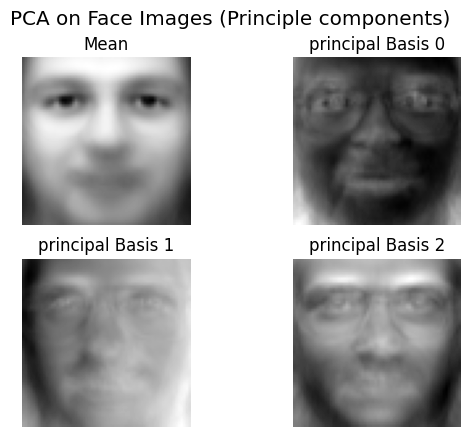

In [9]:
fig, axs = plt.subplots(2, 2)
fig.suptitle("PCA on Face Images (Principle components) ", fontsize="x-large")
for i in range(4):
    r, c = int(i / 2), i % 2
    if r == 0 and c == 0:
        # mu plot
        axs[r, c].imshow(mu.reshape(h, w), cmap='gray')
        axs[r, c].axis('off')
        axs[r, c].set_title('Mean')
    else:
        # plots the first three Eigenfaces
        axs[r, c].imshow(V[i - 1].reshape(h, w), cmap='gray')
        axs[r, c].axis('off')
        axs[r, c].set_title('principal Basis {}'.format(i - 1))

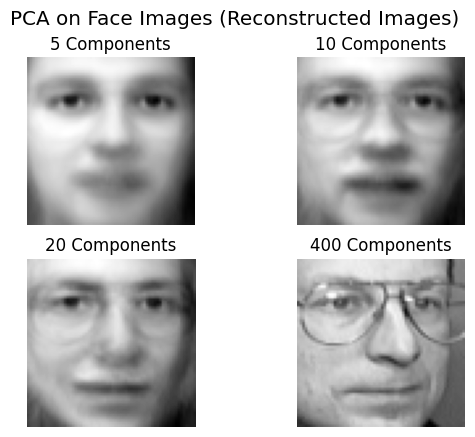

In [10]:
ndx = 125
Ks = [5, 10, 20, matrix_rank(X)]
fig, axs = plt.subplots(2, 2)
fig.suptitle("PCA on Face Images (Reconstructed Images) ", fontsize="x-large")
count = 0
for k in Ks:
    Xrecon = np.dot(Z[np.newaxis, ndx, :k], V[:k, :]) + mu
    r, c = int(count / 2), count % 2
    axs[r, c].imshow(Xrecon.reshape(64, 64), cmap='gray')
    axs[r, c].axis('off')
    axs[r, c].set_title('{} Components'.format(k))
    count += 1

Text(0.5, 0, 'K')

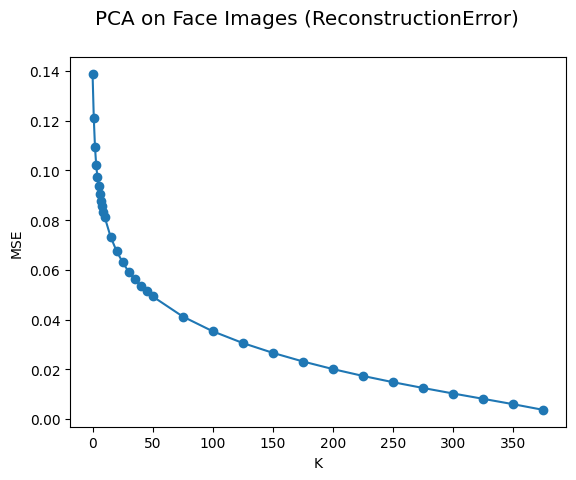

In [11]:
fig, axs = plt.subplots(1, 1)
fig.suptitle("PCA on Face Images (ReconstructionError) ", fontsize="x-large")
Ks = []
Ks.extend(list(np.arange(0, 10, 1)))
Ks.extend(list(np.arange(10, 50, 5)))
Ks.extend(list(np.arange(50, matrix_rank(X), 25)))
mse = np.zeros(len(Ks))
count = 0
for k in Ks:
    Xrecon = np.dot(Z[:, :k], V[:k, :]) + mu
    err = (Xrecon - X)
    mse[count] = np.sqrt(np.mean(err ** 2))
    count += 1

axs.plot(Ks, mse, '-o')
axs.set_ylabel('MSE')
axs.set_xlabel('K')

In [12]:
elbow_index = np.argmin(np.abs(np.diff(mse))) + 1
elbow_value = Ks[elbow_index]
print(elbow_value)

10

Text(0.5, 0, 'K')

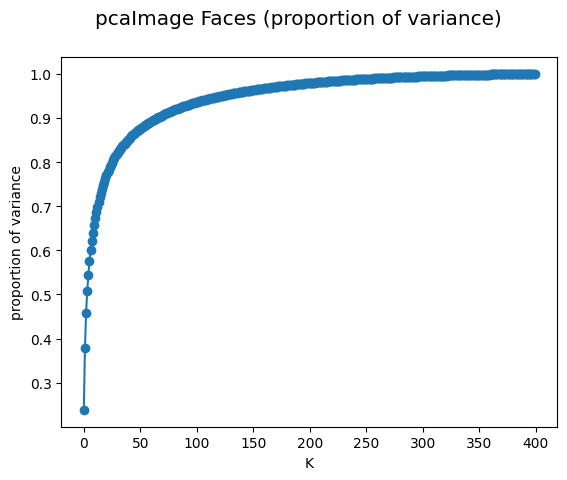

In [13]:
fig, axs = plt.subplots(1, 1)
fig.suptitle("pcaImage Faces (proportion of variance) ", fontsize="x-large")
exp_var = np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_)
axs.plot(exp_var, 'o-')
axs.set_ylabel('proportion of variance')
axs.set_xlabel('K')

In [28]:
threshold = 0.8
idx_variance = np.where(exp_var>threshold)[0][0]
idx_variance

26

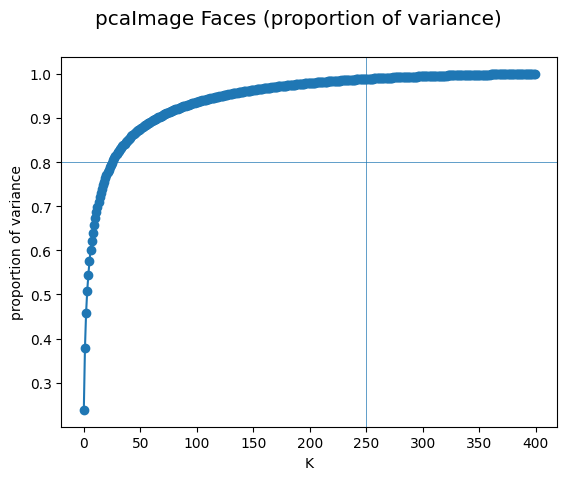

In [26]:
fig, axs = plt.subplots(1, 1)
fig.suptitle("pcaImage Faces (proportion of variance) ", fontsize="x-large")
exp_var = np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_)
axs.plot(exp_var, 'o-')
axs.set_ylabel('proportion of variance')
axs.set_xlabel('K')
axs.axhline(threshold, linewidth=0.5)
axs.axvline(elbow_value, linewidth=0.5)

In [24]:
idx_variance

26